<a href="https://colab.research.google.com/github/madhusowmya/madhusowmya.github.io/blob/master/lr%3D0_01HW4_CNN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

Mounted at /content/drive


In [ ]:
# Seperating the independent feature as y
y = train['label']
train = train.drop('label', axis =1)

In [ ]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)
test = test.reshape(test.shape[0], 28, 28,1)

#Splitting the data into training and validation 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, y, test_size=0.2)

#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=10)

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image
# Image("model.png")

SGD

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [ ]:
history_SGD = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/15
525/525 [==============================] - 39s 74ms/step - loss: 0.5801 - accuracy: 0.8102 - val_loss: 0.1071 - val_accuracy: 0.9689
Epoch 2/15
525/525 [==============================] - 38s 73ms/step - loss: 0.1792 - accuracy: 0.9421 - val_loss: 0.0450 - val_accuracy: 0.9842
Epoch 3/15
525/525 [==============================] - 38s 73ms/step - loss: 0.1235 - accuracy: 0.9615 - val_loss: 0.0423 - val_accuracy: 0.9864
Epoch 4/15
525/525 [==============================] - 38s 73ms/step - loss: 0.1047 - accuracy: 0.9675 - val_loss: 0.0411 - val_accuracy: 0.9883
Epoch 5/15
525/525 [==============================] - 38s 73ms/step - loss: 0.0924 - accuracy: 0.9707 - val_loss: 0.0403 - val_accuracy: 0.9877
Epoch 6/15
525/525 [==============================] - 38s 72ms/step - loss: 0.0843 - accuracy: 0.9746 - val_loss: 0.0307 - val_accuracy: 0.9905
Epoch 7/15
525/525 [==============================] - 38s 72ms/step - loss: 0.0784 - accuracy: 0.9768 - val_loss: 0.0355 - val_accuracy:

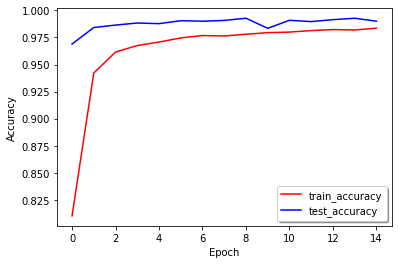

In [ ]:
plt.plot(history_SGD.history['accuracy'], color='r')
plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

RMSProp

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.RMSprop(lr=0.01, momentum=0.0,rho=0.9,epsilon=1e-07), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [ ]:
history_RMS = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.1052 - accuracy: 0.1250

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 45s 86ms/step - loss: 0.3214 - accuracy: 0.8995 - val_loss: 0.1325 - val_accuracy: 0.9667
Epoch 2/15
525/525 [==============================] - 45s 86ms/step - loss: 0.1334 - accuracy: 0.9588 - val_loss: 0.0687 - val_accuracy: 0.9804
Epoch 3/15
525/525 [==============================] - 45s 86ms/step - loss: 0.1084 - accuracy: 0.9671 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 4/15
525/525 [==============================] - 46s 87ms/step - loss: 0.0926 - accuracy: 0.9716 - val_loss: 0.0402 - val_accuracy: 0.9881
Epoch 5/15
525/525 [==============================] - 46s 88ms/step - loss: 0.0823 - accuracy: 0.9748 - val_loss: 0.0360 - val_accuracy: 0.9905
Epoch 6/15
525/525 [==============================] - 46s 87ms/step - loss: 0.0779 - accuracy: 0.9768 - val_loss: 0.0407 - val_accuracy: 0.9893
Epoch 7/15
525/525 [==============================] - 47s 89ms/step - loss: 0.0724 - accuracy: 0.9779 - val_loss: 0.0441 - val_accuracy: 0.9876
Epo

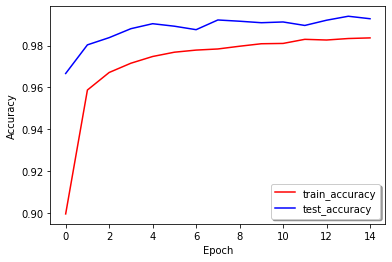

In [ ]:
plt.plot(history_RMS.history['accuracy'], color='r')
plt.plot(history_RMS.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Adam


In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)

In [ ]:
history_Adam = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.0556 - accuracy: 0.0469

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 40s 76ms/step - loss: 0.4143 - accuracy: 0.8641 - val_loss: 0.1099 - val_accuracy: 0.9692
Epoch 2/15
525/525 [==============================] - 39s 74ms/step - loss: 0.1434 - accuracy: 0.9554 - val_loss: 0.0615 - val_accuracy: 0.9811
Epoch 3/15
525/525 [==============================] - 39s 75ms/step - loss: 0.1177 - accuracy: 0.9641 - val_loss: 0.0388 - val_accuracy: 0.9886
Epoch 4/15
525/525 [==============================] - 39s 75ms/step - loss: 0.1018 - accuracy: 0.9689 - val_loss: 0.0444 - val_accuracy: 0.9871
Epoch 5/15
525/525 [==============================] - 39s 75ms/step - loss: 0.0969 - accuracy: 0.9701 - val_loss: 0.0334 - val_accuracy: 0.9894
Epoch 6/15
525/525 [==============================] - 39s 75ms/step - loss: 0.0851 - accuracy: 0.9737 - val_loss: 0.0348 - val_accuracy: 0.9892
Epoch 7/15
525/525 [==============================] - 40s 76ms/step - loss: 0.0780 - accuracy: 0.9767 - val_loss: 0.0308 - val_accuracy: 0.9912
Epo

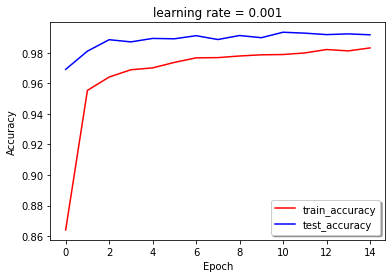

In [ ]:
plt.plot(history_Adam.history['accuracy'], color='r')
plt.plot(history_Adam.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('learning rate = 0.001')
plt.show()


Adamax

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
             
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adamax'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adamax = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 2.9704 - accuracy: 0.0938

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 41s 77ms/step - loss: 0.4619 - accuracy: 0.8498 - val_loss: 0.0686 - val_accuracy: 0.9785
Epoch 2/15
525/525 [==============================] - 40s 77ms/step - loss: 0.1349 - accuracy: 0.9581 - val_loss: 0.0526 - val_accuracy: 0.9827
Epoch 3/15
525/525 [==============================] - 40s 77ms/step - loss: 0.1113 - accuracy: 0.9656 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch 4/15
525/525 [==============================] - 41s 78ms/step - loss: 0.0962 - accuracy: 0.9711 - val_loss: 0.0448 - val_accuracy: 0.9862
Epoch 5/15
525/525 [==============================] - 41s 78ms/step - loss: 0.0840 - accuracy: 0.9737 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 6/15
525/525 [==============================] - 40s 77ms/step - loss: 0.0780 - accuracy: 0.9759 - val_loss: 0.0291 - val_accuracy: 0.9890
Epoch 7/15
525/525 [==============================] - 41s 78ms/step - loss: 0.0691 - accuracy: 0.9780 - val_loss: 0.0332 - val_accuracy: 0.9888
Epo

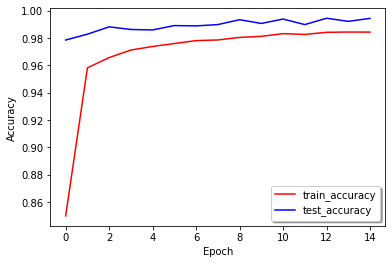

In [ ]:
plt.plot(history_Adamax.history['accuracy'], color='r')
plt.plot(history_Adamax.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


AdaGrad


In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adagrad(learning_rate=0.01,initial_accumulator_value=0.1, epsilon=1e-07,name='Adagrad'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adagrad = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.1651 - accuracy: 0.1094

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 39s 74ms/step - loss: 0.5260 - accuracy: 0.8337 - val_loss: 0.0892 - val_accuracy: 0.9762
Epoch 2/15
525/525 [==============================] - 39s 74ms/step - loss: 0.1930 - accuracy: 0.9420 - val_loss: 0.0528 - val_accuracy: 0.9857
Epoch 3/15
525/525 [==============================] - 38s 72ms/step - loss: 0.1464 - accuracy: 0.9553 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch 4/15
525/525 [==============================] - 38s 72ms/step - loss: 0.1245 - accuracy: 0.9608 - val_loss: 0.0357 - val_accuracy: 0.9905
Epoch 5/15
525/525 [==============================] - 37s 71ms/step - loss: 0.1079 - accuracy: 0.9686 - val_loss: 0.0306 - val_accuracy: 0.9901
Epoch 6/15
525/525 [==============================] - 37s 71ms/step - loss: 0.1012 - accuracy: 0.9694 - val_loss: 0.0269 - val_accuracy: 0.9918
Epoch 7/15
525/525 [==============================] - 38s 72ms/step - loss: 0.0908 - accuracy: 0.9721 - val_loss: 0.0330 - val_accuracy: 0.9898
Epo

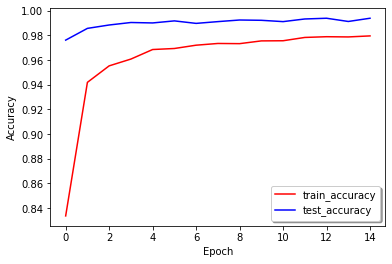

In [ ]:
plt.plot(history_Adagrad.history['accuracy'], color='r')
plt.plot(history_Adagrad.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Adadelta

In [ ]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Adadelta(learning_rate=0.01, rho=0.95, epsilon=1e-07,name='Adadelta'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adadelta = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.1252 - accuracy: 0.0781

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 37s 71ms/step - loss: 2.2711 - accuracy: 0.2570 - val_loss: 1.0727 - val_accuracy: 0.7367
Epoch 2/15
525/525 [==============================] - 38s 73ms/step - loss: 1.5428 - accuracy: 0.4822 - val_loss: 0.5654 - val_accuracy: 0.8769
Epoch 3/15
525/525 [==============================] - 38s 73ms/step - loss: 1.1478 - accuracy: 0.6270 - val_loss: 0.3650 - val_accuracy: 0.9170
Epoch 4/15
525/525 [==============================] - 37s 71ms/step - loss: 0.9004 - accuracy: 0.7173 - val_loss: 0.2698 - val_accuracy: 0.9406
Epoch 5/15
525/525 [==============================] - 37s 70ms/step - loss: 0.7487 - accuracy: 0.7671 - val_loss: 0.2138 - val_accuracy: 0.9527
Epoch 6/15
525/525 [==============================] - 37s 71ms/step - loss: 0.6408 - accuracy: 0.8044 - val_loss: 0.1802 - val_accuracy: 0.9592
Epoch 7/15
525/525 [==============================] - 38s 72ms/step - loss: 0.5545 - accuracy: 0.8313 - val_loss: 0.1543 - val_accuracy: 0.9638
Epo

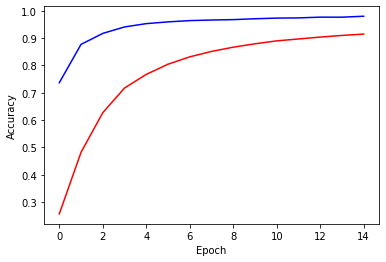

In [51]:
plt.plot(history_Adadelta.history['accuracy'], color='r')
plt.plot(history_Adadelta.history['val_accuracy'], color='b')
#plt.legend(('train_accuracy','test_accuracy'),loc = 'lower right',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


NAdam

In [49]:
#Preparing a CNN model architecture
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu',padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

In [50]:
#Compiling the model
model.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate=0.01,epsilon=1e-07,name='NAdam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_NAdam = model.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.0648 - accuracy: 0.1406

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 51s 97ms/step - loss: 0.3078 - accuracy: 0.9030 - val_loss: 0.1053 - val_accuracy: 0.9713
Epoch 2/15
525/525 [==============================] - 51s 97ms/step - loss: 0.1283 - accuracy: 0.9604 - val_loss: 0.0457 - val_accuracy: 0.9868
Epoch 3/15
525/525 [==============================] - 49s 94ms/step - loss: 0.1077 - accuracy: 0.9668 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 4/15
525/525 [==============================] - 49s 94ms/step - loss: 0.0941 - accuracy: 0.9708 - val_loss: 0.0328 - val_accuracy: 0.9907
Epoch 5/15
525/525 [==============================] - 51s 96ms/step - loss: 0.0868 - accuracy: 0.9725 - val_loss: 0.0289 - val_accuracy: 0.9917
Epoch 6/15
525/525 [==============================] - 52s 98ms/step - loss: 0.0777 - accuracy: 0.9762 - val_loss: 0.0429 - val_accuracy: 0.9880
Epoch 7/15
525/525 [==============================] - 51s 97ms/step - loss: 0.0900 - accuracy: 0.9722 - val_loss: 0.0373 - val_accuracy: 0.9882
Epo

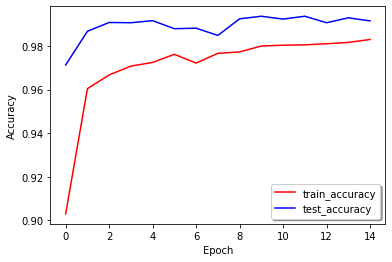

In [58]:
plt.plot(history_NAdam.history['accuracy'], color='r')
plt.plot(history_NAdam.history['val_accuracy'], color='b')
plt.legend(('train_accuracy','test_accuracy'),loc = 'lower right',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


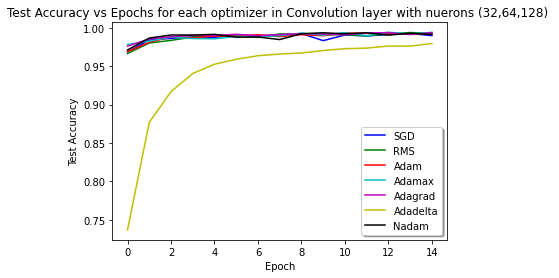

In [59]:
plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.plot(history_RMS.history['val_accuracy'], color='g')
plt.plot(history_Adam.history['val_accuracy'], color='r')
plt.plot(history_Adamax.history['val_accuracy'], color='c')
plt.plot(history_Adagrad.history['val_accuracy'], color='m')
plt.plot(history_Adadelta.history['val_accuracy'], color='y')
plt.plot(history_NAdam.history['val_accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.title('Test Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()
# fig , ax = plt.subplots()
# y1 = history_SGD.history['val_accuracy']
# y2 = history_RMS.history['val_accuracy']
# y3 = history_Adam.history['val_accuracy']
# y4 = history_Adamax.history['val_accuracy']
# y5 = history_Adagrad.history['val_accuracy']
# y6 = history_Adadelta.history['val_accuracy']
# y7 = history_NAdam.history['val_accuracy']
# x = np.arange(start=1, stop=16, step=1)
# plt.ylim(0.0,1.1)
# plt.plot(x, y1, y2, y3, y4, y5, y6,y7)
# plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
# plt.ylabel('Test Accuracy')
# plt.xlabel('Epoch')
# plt.title('Test Accuracy for')
# plt.show()


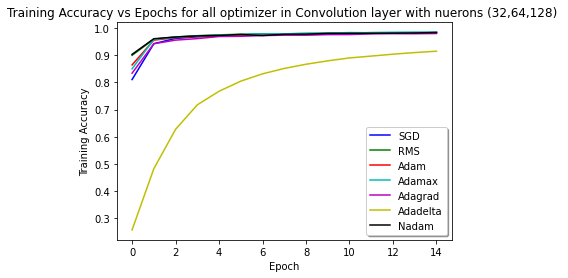

In [54]:
plt.plot(history_SGD.history['accuracy'], color='b')
plt.plot(history_RMS.history['accuracy'], color='g')
plt.plot(history_Adam.history['accuracy'], color='r')
plt.plot(history_Adamax.history['accuracy'], color='c')
plt.plot(history_Adagrad.history['accuracy'], color='m')
plt.plot(history_Adadelta.history['accuracy'], color='y')
plt.plot(history_NAdam.history['accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.title('Training Accuracy vs Epochs for all optimizer in Convolution layer with nuerons (32,64,128) ')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.show()



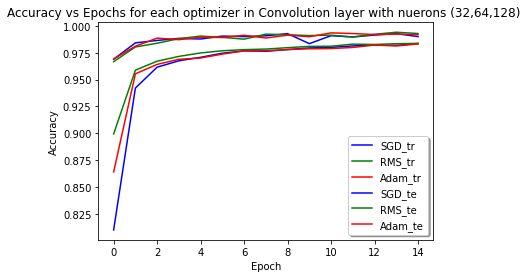

In [55]:
plt.plot(history_SGD.history['accuracy'], color='b')
plt.plot(history_RMS.history['accuracy'], color='g')
plt.plot(history_Adam.history['accuracy'], color='r')

plt.plot(history_SGD.history['val_accuracy'], color='b')
plt.plot(history_RMS.history['val_accuracy'], color='g')
plt.plot(history_Adam.history['val_accuracy'], color='r')


plt.legend(('SGD_tr','RMS_tr','Adam_tr','SGD_te','RMS_te','Adam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()

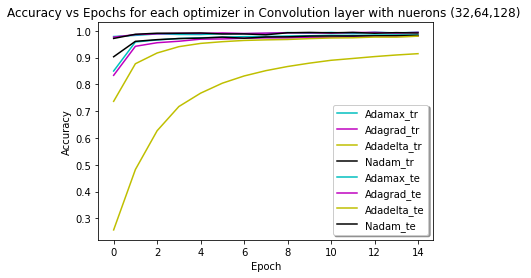

In [57]:
plt.plot(history_Adamax.history['accuracy'], color='c')
plt.plot(history_Adagrad.history['accuracy'], color='m')
plt.plot(history_Adadelta.history['accuracy'], color='y')
plt.plot(history_NAdam.history['accuracy'], color='k')
plt.plot(history_Adamax.history['val_accuracy'], color='c')
plt.plot(history_Adagrad.history['val_accuracy'], color='m')
plt.plot(history_Adadelta.history['val_accuracy'], color='y')
plt.plot(history_NAdam.history['val_accuracy'], color='k')
plt.legend(('Adamax_tr','Adagrad_tr','Adadelta_tr','Nadam_tr','Adamax_te','Adagrad_te','Adadelta_te','Nadam_te'),loc = 'best',shadow = True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy vs Epochs for each optimizer in Convolution layer with nuerons (32,64,128) ')
plt.show()